In [1]:
import pandas as pd
from time import strftime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('raw.csv')

In [3]:
df.head(10)

,user_id,date,money,time,country
0,U10000,1/10/2019,2,89,Canada
1,U10000,7/10/2019,0,35,Canada
2,U10000,9/10/2019,2,4,Canada
3,U10000,10/10/2019,1,5,Canada
4,U10000,12/10/2019,1,17,Canada
5,U10000,15/10/2019,0,16,Canada
6,U10001,1/10/2019,1,134,Canada
7,U10001,2/10/2019,2,60,Canada
8,U10001,3/10/2019,0,55,Canada
9,U10001,4/10/2019,1,77,Canada


In [4]:
df.date = pd.to_datetime(df.date, format='%d/%m/%Y')

In [5]:
dfc = df.groupby('user_id')['date']
df = df.assign(first_date=dfc.transform(min), last_date=dfc.transform(max))
df['seniority'] = (df['date'] - df['first_date']).dt.days

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     822 non-null    object        
 1   date        822 non-null    datetime64[ns]
 2   money       822 non-null    int64         
 3   time        822 non-null    int64         
 4   country     822 non-null    object        
 5   first_date  822 non-null    datetime64[ns]
 6   last_date   822 non-null    datetime64[ns]
 7   seniority   822 non-null    int64         
dtypes: datetime64[ns](3), int64(3), object(2)
memory usage: 45.0+ KB


In [7]:
df['total'] = 'total'

In [8]:
df.head(10)

,user_id,date,money,time,country,first_date,last_date,seniority,total
0,U10000,2019-10-01,2,89,Canada,2019-10-01,2019-10-15,0,total
1,U10000,2019-10-07,0,35,Canada,2019-10-01,2019-10-15,6,total
2,U10000,2019-10-09,2,4,Canada,2019-10-01,2019-10-15,8,total
3,U10000,2019-10-10,1,5,Canada,2019-10-01,2019-10-15,9,total
4,U10000,2019-10-12,1,17,Canada,2019-10-01,2019-10-15,11,total
5,U10000,2019-10-15,0,16,Canada,2019-10-01,2019-10-15,14,total
6,U10001,2019-10-01,1,134,Canada,2019-10-01,2019-10-06,0,total
7,U10001,2019-10-02,2,60,Canada,2019-10-01,2019-10-06,1,total
8,U10001,2019-10-03,0,55,Canada,2019-10-01,2019-10-06,2,total
9,U10001,2019-10-04,1,77,Canada,2019-10-01,2019-10-06,3,total


In [9]:
group = df.groupby(['total', 'seniority'])

In [10]:
cohort_data = group['user_id'].size()

In [11]:
cohort_data

total  seniority
total  0            168
       1            116
       2            109
       3             99
       4             82
       5             61
       6             47
       7             37
       8             31
       9             24
       10            17
       11            10
       12            13
       13             5
       14             3
Name: user_id, dtype: int64

In [12]:
cohort_data = cohort_data.reset_index()

In [13]:
cohort_data

,total,seniority,user_id
0,total,0,168
1,total,1,116
2,total,2,109
3,total,3,99
4,total,4,82
5,total,5,61
6,total,6,47
7,total,7,37
8,total,8,31
9,total,9,24


In [14]:
cohort_counts = cohort_data.pivot(index='total', columns='seniority', values='user_id')

In [15]:
cohort_counts

seniority,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
total,,,,,,,,,,,,,,,
total,168,116,109,99,82,61,47,37,31,24,17,10,13,5,3


In [16]:
base = cohort_counts[0]

In [17]:
retention = cohort_counts.divide(base, axis=0).round(3)
retention

seniority,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
total,,,,,,,,,,,,,,,
total,1.0,0.69,0.649,0.589,0.488,0.363,0.28,0.22,0.185,0.143,0.101,0.06,0.077,0.03,0.018


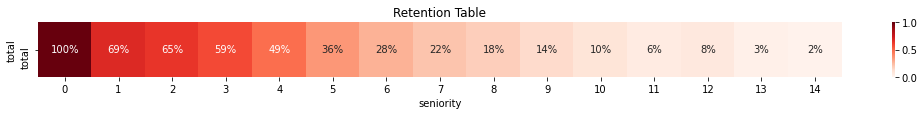

In [18]:
plt.figure(figsize=(18,1))
plt.title('Retention Table')
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
plt.show()